In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [3]:
!pip install pyspark

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col,max,struct
import matplotlib.pyplot as plt


In [5]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()


In [6]:
listening_csv_path = '/content/drive/MyDrive/dataset_pyspark/listenings.csv'

listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)


In [7]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [8]:
listening_df = listening_df.drop('date')

In [9]:
listening_df = listening_df.na.drop()

In [11]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [12]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [13]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


In [14]:
# Select two coloums: track and artist
q0 = listening_df.select('track','artist')
q0.show()


+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



In [15]:
# let's find all of the records of those users who have listened to Rihanna.
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

In [19]:
# Top 10 users who are fan of Rihanna.
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna')
q2 = q2.groupBy('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



In [20]:
# Top 10 famouse tracks
q3 = listening_df.groupBy('track').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+-------+-----+
|  track|count|
+-------+-----+
|  Intro|13176|
|   Home| 7576|
|  Hello| 6961|
|Hold On| 5857|
|   Work| 4889|
|  Sorry| 4824|
|   Baby| 4646|
|Runaway| 4429|
| Closer| 4287|
|   Fire| 4141|
+-------+-----+



In [22]:
qq = listening_df.select('artist', 'track').groupBy('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
qq.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [23]:
# Top 10 famouse tracks of Rihanna.
q4 = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihanna').groupBy('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



In [24]:
# Top 10 famouse albume
q5 = listening_df.select('artist', 'album').groupBy('artist', 'album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()


+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



In [25]:
genre_csv_path = '/content/drive/MyDrive/dataset_pyspark/genre.csv'

genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

In [26]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [27]:
# Join two dataframe
data = listening_df.join(genre_df, on='artist')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [29]:
# Top 10 users who are fan of pop music.
q6 = data.select('user_id').filter(data.genre == 'pop').groupBy('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q6.show()


+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [30]:
# Top 10 famous genre.
q7 = data.groupBy('genre').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [37]:
# Find out each user favourite genre.
q8 = data.groupBy('user_id', 'genre').agg(count('user_id').alias('count')).orderBy('user_id', desc('count'))

q8.show()



+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|           classical|   31|
| --Seph|                rock|   27|
| --Seph|          indie rock|   15|
| --Seph|               opera|   12|
| --Seph|                folk|   10|
| --Seph|                 pop|    9|
| --Seph|               Bjorn|    8|
| --Seph|             hip hop|    7|
| --Seph|             ambient|    6|
| --Seph|          electronic|    6|
| --Seph|               Ruben|    4|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|              Xzibit|    4|
| --Seph| Charis Henry & M...|    4|
| --Seph|          snoop dogg|    4|
| --Seph|             Hittman|    4|
| --Seph|            King Mez|    4|
| --Seph|      Kendrick Lamar|    4|
| --Seph|          Snoop Dogg|    4|
| --Seph|                 RBX|    4|
+-------+--------------------+-----+
only showing top 20 rows



In [34]:
from pyspark.sql.functions import struct

In [39]:
q8_2 = q8.groupBy('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')) # Corrected to .alias()

q8_2.show()

+---------------+-----------------+
|        user_id|              max|
+---------------+-----------------+
|      --Shinn--|      {112, rock}|
|       --ollz--|       {47, rock}|
|     -Amnesiac-|     {323, metal}|
|         -Bish-|       {59, rock}|
|        -Danni-|       {45, rock}|
|          -DeWp|    {82, hip hop}|
|      -Faction-|       {56, rock}|
|-February-Star-|       {74, rock}|
|        -Gemma-|{38, british pop}|
|   -Gingergirl-|        {28, pop}|
|        -Hazel-|   {14, synthpop}|
|        -Heiko-| {43, electronic}|
|         -Katie|      {58, lo-fi}|
|      -Krystal-|       {87, rock}|
|         -Mark-| {37, indie rock}|
|       -Mullet-|  {60, metalcore}|
|          -Robs|       {38, rock}|
| -SleepingStar-|{57, black metal}|
|      -Stifler-|      {144, rock}|
|  -Toxic-Waste-|  {55, aggrotech}|
+---------------+-----------------+
only showing top 20 rows



In [40]:
qq = q8_2.select('user_id', col('max.genre'))
qq.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



In [45]:
# Filter the dataset for specific genres
q9 = genre_df.select("genre").filter(
    (col("genre") == "pop") |
    (col("genre") == "rock") |
    (col("genre") == "metal") |
    (col("genre") == "hip hop")
)

# Count occurrences of each genre
q9_count = q9.groupBy("genre").count()

# Show the result
q9_count.show()


+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [47]:
q9_list = q9_count.collect()

In [49]:
lables = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

<BarContainer object of 4 artists>

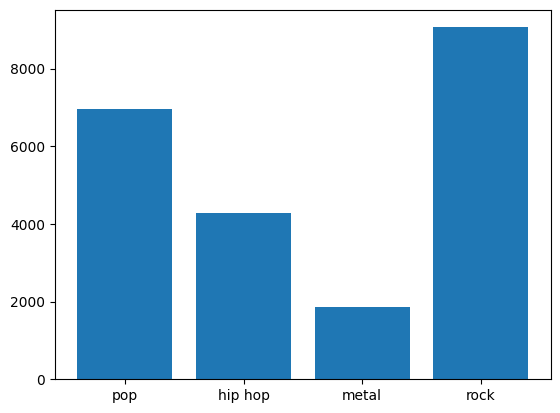

In [51]:
plt.bar(lables, counts)

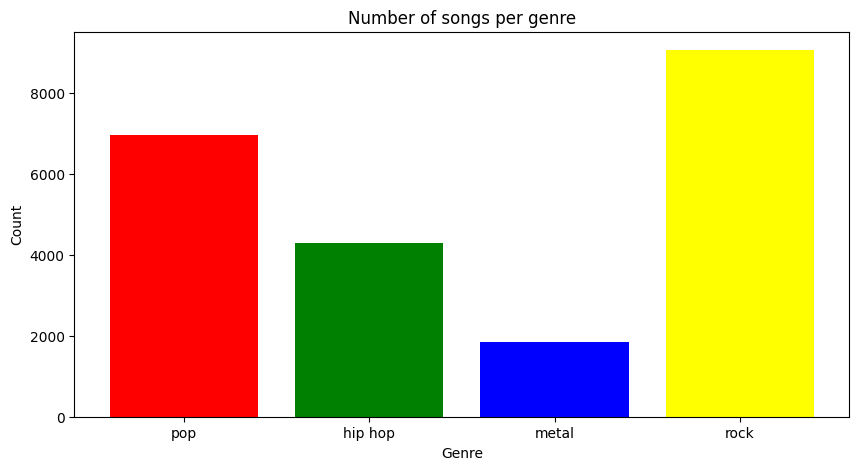

In [52]:
import matplotlib.pyplot as plt

# Assuming q9_list, lables, and counts are defined from the previous code

plt.figure(figsize=(10, 5))
plt.bar(lables, counts, color=['red', 'green', 'blue', 'yellow'])
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of songs per genre")
plt.show()